# <center> ATIVIDADE FINAL DE MACHINE LEARNING </center><br>
**FUNDAÇÃO INSTITUTO DE ADMINISTRAÇÃO - FIA**<br>
**Aula:** <u>Machine Learning</u><br>
**Turma:** <u>Big Data T13</u><br>
**Aluno:** <u>André Ricardo de Moraes Souza</u><br>
**Professor:** <u> Lucas Roberto Correa</u><br>
**Data:** <u> 13/04/2020</u><br>

## Atividades:

- Criar uma base de modelagem, contendo os dados de ambas as bases e com a variável resposta.
- Fazer uma EDA da base (describe, e alguma visualização das distribuições, análise de missing).
- Fazer os tratamentos dos dados, visto em aula (imputação, dummies…) e gerar a ABT de modelagem.
- Usar os métodos de seleção aprendidos (filtro, wrapper e embedded)
- Fazer a modelagem usando grid search e cross validation K fold. (regressão logistica, arvore, random forest e gradient boosting)
- Escolher o melhor modelo, usando a métrica escolhida de performance.
- Salvar usando pickle/ joblib.
- Gerar comentários para cada etapa.
<br>
---
## Entendimento do problema

O banco <b>LABDATA</b> deseja construir um modelo para prever quem vai cancelar o cartão.<br>
Para a resolução deste serão diposnibilizados alguns dados históricos para análise e construção do modelo.<br>

## Aquisição dos dados
O banco LABDATA diposnibilizou 2 bases de dados:<br>

* CartaoCredito_cancelamento.csv – Com a lista de pessoas que cancelaram o cc e suas vars explicativas.
* CartaoCredito_semtarget.csv – Com a lista de pessoas que não cancelaram e suas vars explicativas.

<a href='CartaoCredito_cancelamento.csv'>CartaoCredito_cancelamento.csv</a><br>
<a href='CartaoCredito_semtarget.csv'>CartaoCredito_semtarget.csv</a>

## Entendimento dos dados

In [1]:
#import

#leitura dos dados
import pandas as pd
import numpy as np

#graficos
import matplotlib.pyplot as plt
import seaborn as sns

#label encoder
from sklearn import preprocessing

#seleção de variáveis baseado em filtro
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#seleção de variáveis baseado em wrapper
from sklearn.feature_selection import RFE

#seleção de variáveis baseado emembedded
from sklearn.feature_selection import SelectFromModel

#treino/teste
from sklearn.model_selection import train_test_split

#modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

#acuracia
from sklearn.metrics import accuracy_score

#cross validation
from sklearn.model_selection import cross_val_score

#export modelo
import pickle

#warnings
import warnings

In [2]:
#configuração do matplotlib
%matplotlib inline

In [3]:
#configuração do pandas
pd.set_option('display.max_columns', None)

In [4]:
#formatando a exibição de dados muito grandes
pd.options.display.float_format = '{:.2f}'.format

In [5]:
#suprimindo warnings
warnings.filterwarnings('ignore')

In [6]:
#leitura dos dados que cancelaram
dados1 = pd.read_csv('CartaoCredito_cancelamento.csv', sep=',')
#definição da variável TARGET com o valor 1
dados1['Target']=1
#visualizando as primeiras linhas da base importada
dados1.head()

,ID,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade,Target
0,180,2,mulher,24,2,1875,133.93,156.25,MA,Centro Novo do Maranhão,Região Nordeste,13.02,2,"251,1938708281",1
1,119,3,mulher,22,0,725,51.79,60.42,PI,Amarante,Região Nordeste,5.49,13,"233,5439410115",1
2,274,3,homem,22,0,72292,5163.71,6024.33,MT,Santo Antônio do Leverger,Região Centro-Oeste,547.67,2,"275,4369442974",1
3,107,3,homem,22,1,155,11.07,12.92,PR,Quitandinha,Região Sul,1.17,13,"2,0031106899",1
4,37,2,mulher,15,1,26,1.86,2.17,SP,Nova Campina,Região Sudeste,0.29,7,"249,3346886075",1


In [7]:
#leitura dos dados que não cancelaram
dados2 = pd.read_csv('CartaoCredito_semtarget.csv', sep=',')
#definição da variável TARGET com o valor 0
dados2['Target']=0
#visualizando as primeiras linhas da base importada
dados2.head()

,ID,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade,Target
0,1,3,homem,22,1,7250.00,517.86,604.17,MG,Morada Nova de Minas,Região Sudeste,54.92,5,"62,9304011407",0
1,2,1,mulher,38,1,71283.00,5091.64,5940.25,RN,Marcelino Vieira,Região Nordeste,312.64,7,"37,9153459043",0
2,3,3,mulher,26,0,7925.00,566.07,660.42,PR,Agudos do Sul,Região Sul,50.80,6,"60,9993188527",0
3,4,1,mulher,35,1,531.00,37.93,44.25,PR,Congonhinhas,Região Sul,2.53,7,"5,3944383134",0
4,5,3,homem,35,0,805.00,57.50,67.08,BA,Morpará,Região Nordeste,3.83,0,"40,9964747337",0


In [8]:
#criando uma base única para analise e tratamento dos dados.
dados = pd.concat([dados1,dados2])
#visualizando as primeiras linhas da base criada
dados.head()

,ID,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade,Target
0,180,2,mulher,24,2,1875.00,133.93,156.25,MA,Centro Novo do Maranhão,Região Nordeste,13.02,2,"251,1938708281",1
1,119,3,mulher,22,0,725.00,51.79,60.42,PI,Amarante,Região Nordeste,5.49,13,"233,5439410115",1
2,274,3,homem,22,0,72292.00,5163.71,6024.33,MT,Santo Antônio do Leverger,Região Centro-Oeste,547.67,2,"275,4369442974",1
3,107,3,homem,22,1,155.00,11.07,12.92,PR,Quitandinha,Região Sul,1.17,13,"2,0031106899",1
4,37,2,mulher,15,1,26.00,1.86,2.17,SP,Nova Campina,Região Sudeste,0.29,7,"249,3346886075",1


In [9]:
dados

,ID,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade,Target
0,180,2,mulher,24,2,1875.00,133.93,156.25,MA,Centro Novo do Maranhão,Região Nordeste,13.02,2,"251,1938708281",1
1,119,3,mulher,22,0,725.00,51.79,60.42,PI,Amarante,Região Nordeste,5.49,13,"233,5439410115",1
2,274,3,homem,22,0,72292.00,5163.71,6024.33,MT,Santo Antônio do Leverger,Região Centro-Oeste,547.67,2,"275,4369442974",1
3,107,3,homem,22,1,155.00,11.07,12.92,PR,Quitandinha,Região Sul,1.17,13,"2,0031106899",1
4,37,2,mulher,15,1,26.00,1.86,2.17,SP,Nova Campina,Região Sudeste,0.29,7,"249,3346886075",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,homem,27,0,13.00,0.93,1.08,BA,Marcionílio Souza,Região Nordeste,0.08,4,"39,6251243037",0
887,888,1,mulher,19,0,30.00,2.14,2.50,BA,Mirante,Região Nordeste,0.26,1,"69,1375904705",0
888,889,3,mulher,35,1,2345.00,167.50,195.42,RO,Governador Jorge Teixeira,Região Norte,11.17,6,"11,4447833656",0
889,890,1,homem,26,0,30.00,2.14,2.50,PI,Baixa Grande do Ribeiro,Região Nordeste,0.19,7,"1,4656174653",0


In [10]:
#removendo a coluna ID que não será utilizada no nosso modelo e na análise:
dados.drop(columns='ID', inplace=True)

In [11]:
print("A primeira base de dados possue:", dados1.shape[0], "linhas e", dados1.shape[1], "colunas")
print("A segunda base de dados possue:", dados2.shape[0], "linhas e", dados2.shape[1], "colunas")
print("A base final de dados possue:", dados.shape[0], "linhas e", dados.shape[1], "colunas")

A primeira base de dados possue: 300 linhas e 15 colunas
A segunda base de dados possue: 891 linhas e 15 colunas
A base final de dados possue: 1191 linhas e 14 colunas


In [12]:
print('Lista de colunas na nossa base de estudo: \n\n',dados.columns.tolist())

Lista de colunas na nossa base de estudo: 

 ['PerfilEconomico', 'Sexo', 'Idade', 'PerfilCompra', 'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'UF', 'CidadeResidencia', 'RegiaodoPais', 'NumeroComprasOnline', 'MesesDesempregado', 'Anuidade', 'Target']


In [13]:
#verificando a ausencia de dados na base
dados.isna().sum()

PerfilEconomico         0
Sexo                    0
Idade                   0
PerfilCompra            0
ValorCompraAnual       28
GastoMax                0
GastoMedio              0
UF                      0
CidadeResidencia        0
RegiaodoPais            0
NumeroComprasOnline     0
MesesDesempregado       0
Anuidade                0
Target                  0
dtype: int64

<font color='red'>**Observação:**</font> Podemos verificar que temos 28 registros nulos na variável <b>ValorCompraAnual</b>.

In [14]:
#conhecendo a variabilidade das variaveis
dados.nunique()

PerfilEconomico           3
Sexo                      2
Idade                    65
PerfilCompra              7
ValorCompraAnual        260
GastoMax                261
GastoMedio              261
UF                       26
CidadeResidencia        851
RegiaodoPais              5
NumeroComprasOnline     704
MesesDesempregado        15
Anuidade               1191
Target                    2
dtype: int64

In [15]:
#visualizando os nossos dados
dados.describe(include='all').T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PerfilEconomico,1191.00,NaN,NaN,NaN,2.29,0.84,1.00,2.00,3.00,3.00,3.00
Sexo,1191,2,homem,759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Idade,1191.00,NaN,NaN,NaN,30.27,12.36,10.00,22.00,26.00,36.00,92.00
PerfilCompra,1191.00,NaN,NaN,NaN,0.53,1.08,0.00,0.00,0.00,1.00,8.00
ValorCompraAnual,1163.00,NaN,NaN,NaN,108034.13,366794.50,0.00,167.00,2625.00,78667.00,5123292.00
GastoMax,1191.00,NaN,NaN,NaN,7834.60,26481.77,0.00,11.71,187.50,5610.14,365949.43
GastoMedio,1191.00,NaN,NaN,NaN,9140.37,30895.40,0.00,13.67,218.75,6545.17,426941.00
UF,1191,26,MG,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CidadeResidencia,1191,851,São Domingos,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RegiaodoPais,1191,5,Região Nordeste,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#verificando os tipos de variáveis
dados.dtypes

PerfilEconomico          int64
Sexo                    object
Idade                    int64
PerfilCompra             int64
ValorCompraAnual       float64
GastoMax               float64
GastoMedio             float64
UF                      object
CidadeResidencia        object
RegiaodoPais            object
NumeroComprasOnline    float64
MesesDesempregado        int64
Anuidade                object
Target                   int64
dtype: object

<font color='red'>**Observação:**</font> É possível verificar que temos variáves numéricas e algumas alphanumericas.<br>
Estas precisam ser tratadas e convertidas para números, afim de podermos fazer os devidos calculos estatísticos.

In [17]:
#verificando a correlação entre as variáveis
dados.corr()

,PerfilEconomico,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,NumeroComprasOnline,MesesDesempregado,Target
PerfilEconomico,1.00,-0.32,0.08,-0.26,-0.27,-0.27,-0.06,0.01,-0.03
Idade,-0.32,1.00,-0.07,0.05,0.05,0.05,-0.03,-0.03,-0.02
PerfilCompra,0.08,-0.07,1.00,-0.04,-0.04,-0.04,-0.02,0.03,0.01
ValorCompraAnual,-0.26,0.05,-0.04,1.00,1.00,1.00,0.08,-0.03,-0.03
GastoMax,-0.27,0.05,-0.04,1.00,1.00,1.00,0.08,-0.03,-0.03
GastoMedio,-0.27,0.05,-0.04,1.00,1.00,1.00,0.08,-0.03,-0.03
NumeroComprasOnline,-0.06,-0.03,-0.02,0.08,0.08,0.08,1.00,-0.00,0.02
MesesDesempregado,0.01,-0.03,0.03,-0.03,-0.03,-0.03,-0.00,1.00,0.32
Target,-0.03,-0.02,0.01,-0.03,-0.03,-0.03,0.02,0.32,1.00


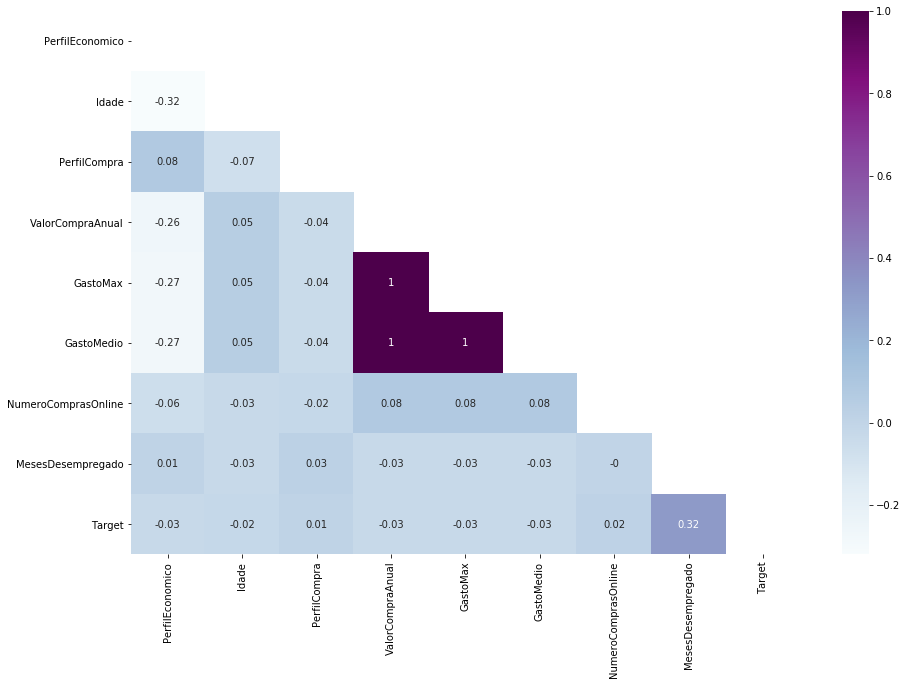

In [18]:
#verificando a correlação entre as variáveis de forma gráfica / visual
plt.figure(figsize=(15,10))
mascara=np.triu(np.ones(dados.corr().shape)).astype(np.bool)
sns.heatmap(dados.corr().round(2), annot=True, cmap="BuPu", mask = mascara)
plt.savefig('corr1.svg')
plt.show()

<font color='red'>**Observação:**</font> Podemos observar visualmente que temos correlações muito forte com algumas variáveis(partes escuras do gráfico):<br>
<font color='green'>
- <b>GastoMax - ValorCompraAnual
- GastoMedio - ValorCompraAnual
- GastoMedio - GastoMax</b>
</font>
Precisamos verificar estas variáveis ao fazer o modelo para que estas não discretizem o modelo, enviezando o mesmo.<br>

<i>Obs.: esta é uma analise inicial da correlação, uma vez que não temos todos os valores em formato numérico neste.</i>

---
Vamos analisar cada uma das variáveis da nossa base...
---

### PerfilEconomico

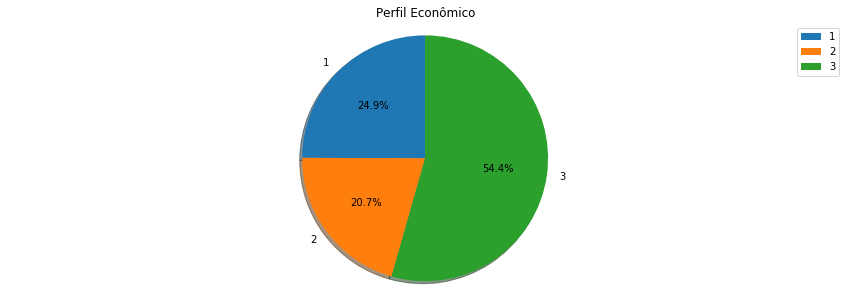

In [19]:
x=dados.groupby('PerfilEconomico', as_index=False)['Target'].count()
labels = x['PerfilEconomico'].tolist()
sizes = x['Target'].tolist() #[215, 130, 245, 210]

# Plot
plt.figure(figsize=(15,5))
plt.title('Perfil Econômico')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.savefig('perfil.svg')
plt.show()

<font color='red'>**Observação:**</font> Temos neste gráfico a representação da variável <B>PerilEconomico</b> e como está a distribuição dos dados na nossa base.<br>
Observa-se que o Perfil 3 é o que mais se destaca neste.

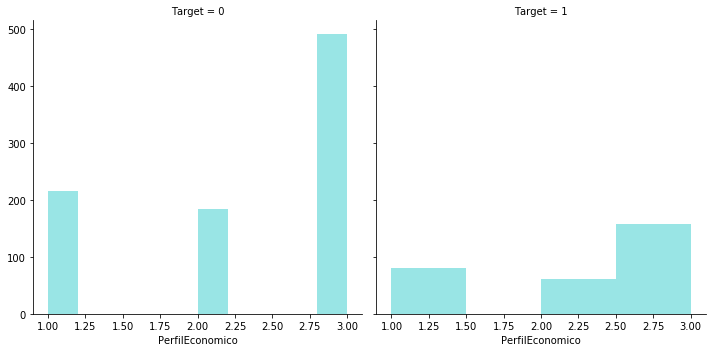

In [20]:
g = sns.FacetGrid(dados, col='Target',height=(5))
g = g.map(sns.distplot, 'PerfilEconomico', kde=False, color='c')

<font color='red'>**Observação:**</font> Segregando os valores da variável <b>PerfilEconomico</b> de acordo com o <b>Target</b>, temos que o perfil 3 ainda é predominante em ambas as divisões da nossa amostra, sendo muito mais presente na base de dados que não tivemos cancelamentos.<br>

### Sexo

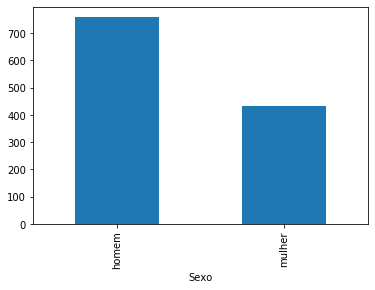

,Sexo,Quantidade,Percentual
0,homem,759,63.73
1,mulher,432,36.27


In [21]:
dados.groupby(by='Sexo')['Target'].count().plot.bar()
plt.savefig('sexo.svg')
plt.show()
temp=dados.groupby('Sexo', as_index=False)['Target'].count()
temp.rename(columns={'Target':'Quantidade'}, inplace=True)
temp['Percentual']=temp['Quantidade']/dados.shape[0]*100
temp

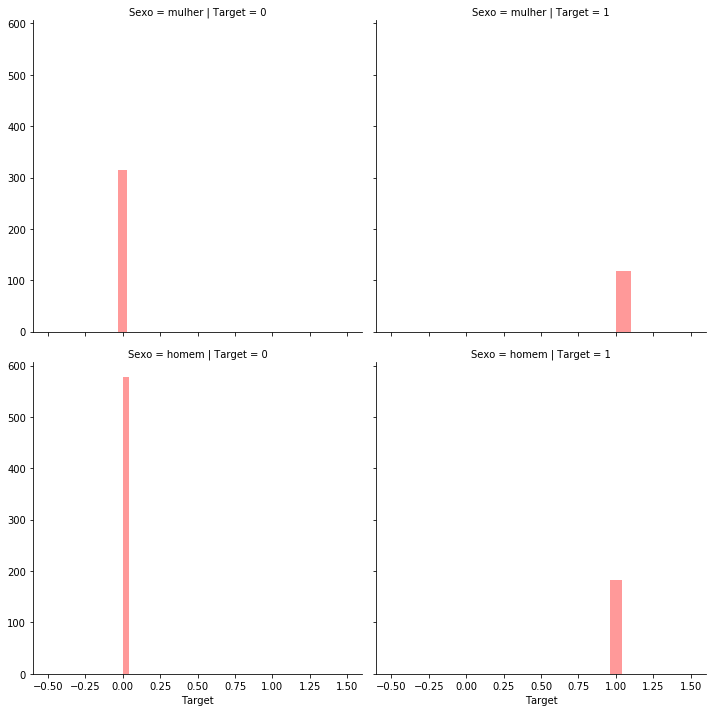

In [22]:
g = sns.FacetGrid(dados, row='Sexo', col='Target', height=5)
g = g.map(sns.distplot, 'Target', kde=False, color='r')

<font color='red'>**Observação:**</font> Segregando os valores da variável <b>Sexo</b> de acordo com o <b>Target</b>, temos que homem cancelaram mais cartões que mulheres e dos cartões não cancelados, temos mais homens do que mulheres.<br>

### IDADE

In [23]:
print('Idade mínima: ', dados['Idade'].min())
print('Idade máxima: ', dados['Idade'].max())
print('Menores de 18:', dados['Idade'][dados['Idade']<18].count())
print('Maiores de 76:', dados['Idade'][dados['Idade']>76].count())

Idade mínima:  10
Idade máxima:  92
Menores de 18: 61
Maiores de 76: 5


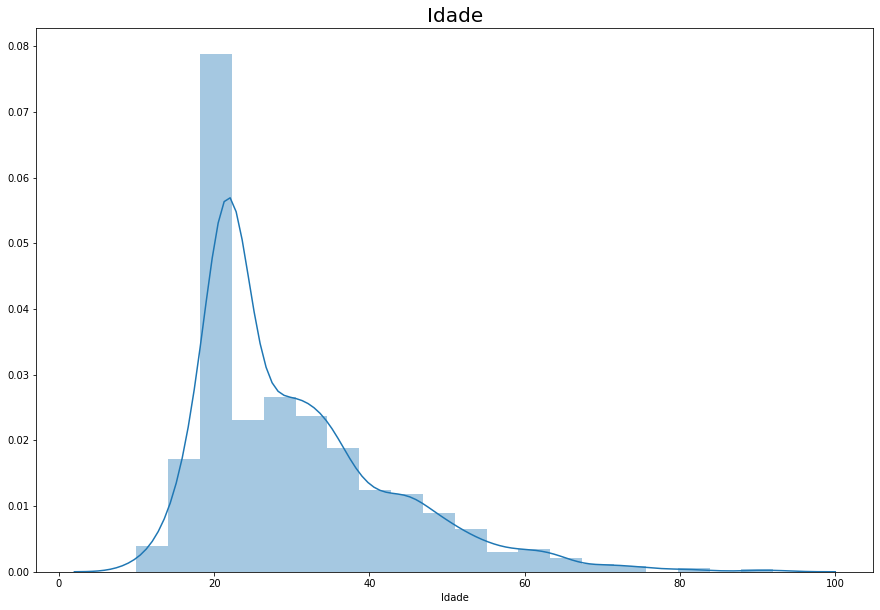

,count,mean,std,min,25%,50%,75%,max
Idade,1191.00,30.27,12.36,10.00,22.00,26.00,36.00,92.00


In [24]:
plt.figure(figsize=(15, 10))
plt.title('Idade', fontsize=20)
sns.distplot(dados["Idade"],  bins=20)
plt.savefig('idade.svg')
plt.show()
dados[["Idade"]].describe().round(2).T

<font color='red'>**Observação:**</font> A variável <b>Idade</b> possue uma distribuição dos dados similar à curva distribuição normal assimétrica à direita.<br>
Os dados estão mais concentrados próximos ao valor 20, o que conclui que a nossa base é composta de pessoas mais jovens.<br>
Uma curiosidade é a existencia de pessoas menores de idade (18 anos). Temos 61 registros.<br>
Outra curiosidade é a existencia de pessoas com idades acima de 76 anos. Idade estimada da espectativa de vida no Brasil.<br><br>
<a href=https://www1.folha.uol.com.br/cotidiano/2019/11/expectativa-de-vida-do-brasileiro-atinge-763-anos-aponta-ibge.shtml>expectativa_de_vida</a><br>
<a href=http://www.stj.jus.br/sites/portalp/Paginas/Comunicacao/Noticias/Maioridade-civil--emancipacao-e-o-entendimento-do-STJ.aspx>maioridade_civil</a>

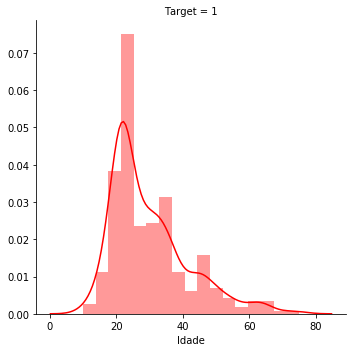

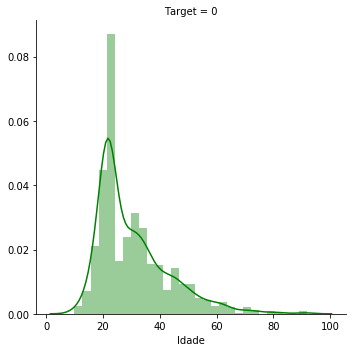

In [25]:
g1 = sns.FacetGrid(dados[dados['Target']==1],  col='Target', height=5)
g1 = g1.map(sns.distplot, 'Idade', color='r')
g2 = sns.FacetGrid(dados[dados['Target']==0],  col='Target', height=5)
g2 = g2.map(sns.distplot, 'Idade', color='g')

<font color='red'>**Observação:**</font> Segregando a variável <b>Idade</b> de acordo com o <b>Target</b> temos uma população quase igual nas duas fontes de dados, tendo na base de cartões não cancelados pessoas mais velhas, mas a concentração de pessoas continua na população mais jovem.<br>

### PerfilCompra

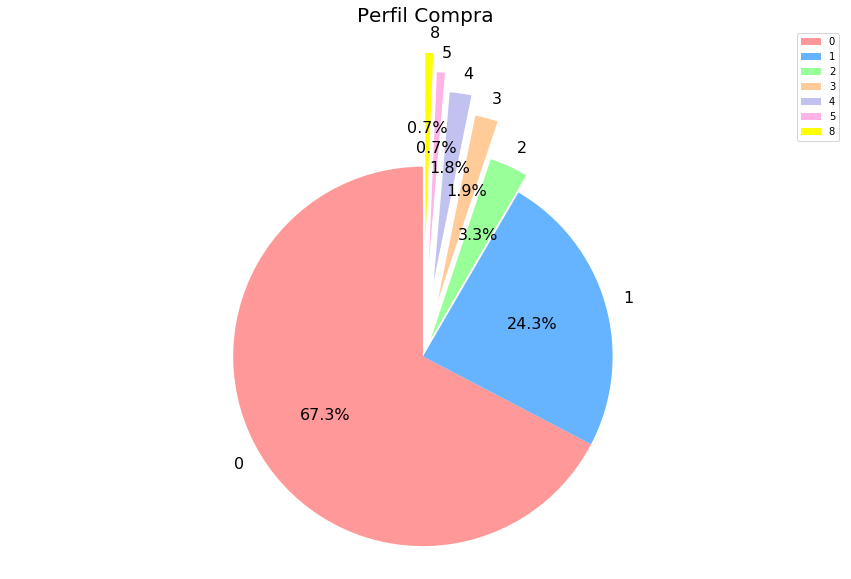

,PerfilCompra,Percentual
0,0,67.34
1,1,24.27
2,2,3.27
3,3,1.93
4,4,1.85
5,5,0.67
6,8,0.67


In [26]:
x=dados.groupby('PerfilCompra', as_index=False)['Target'].count()
labels = x['PerfilCompra'].tolist()
sizes = x['Target'].tolist() 

# Plot
plt.figure(figsize=([15,10]))
plt.title('Perfil Compra', fontsize=20)
explode = (0, 0, 0.1, 0.3,0.4, 0.5,0.6)  
#plt.tight_layout()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#ffff00']
plt.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        shadow=False, 
        startangle=90, 
        explode=explode, 
        colors=colors, 
        textprops={'fontsize': 16})
plt.legend(labels, loc=1)
plt.axis('equal')
plt.savefig('PerfilCompra.svg')
plt.show()
total=dados.shape[0]
x['Percentual']=x['Target']/total*100
x[['PerfilCompra','Percentual']]

<font color='red'>**Observação:**</font> Percemos nesta variável a categorização de 7 Perfis de compra numerados de 0 à 8, mas não temos a presença de dados dos grupos 6 e 7.<br>
O perfil 0 e 1 são os que possuem mais dados.

### ValorCompraAnual

In [27]:
print('a base tem',dados['Target'].count(), 'registros')
print('temos ', dados['ValorCompraAnual'].isna().sum(), 'registros nulos')
print('a média é: ', dados['ValorCompraAnual'].mean())
print('a mediana é: ', dados['ValorCompraAnual'].median())
print('a moda é: ', dados['ValorCompraAnual'].mode())

a base tem 1191 registros
temos  28 registros nulos
a média é:  108034.12811693895
a mediana é:  2625.0
a moda é:  0   805.00
dtype: float64


In [28]:
dados[['ValorCompraAnual','Target']][dados['ValorCompraAnual'].isna()].groupby('Target', as_index=False).count()

,Target,ValorCompraAnual
0,0,0


<font color='red'>**Observação:**</font> Temos 28 registros nulos que precisam ser tratado.<br>
Todos estes registros possuem o Target = 0, ou seja, são dados de clientes que não cancelaram o cartão.<br>
Estes 28 representam 2% da base de dados, portanto vamos remover da base.

In [29]:
dados=dados.dropna()

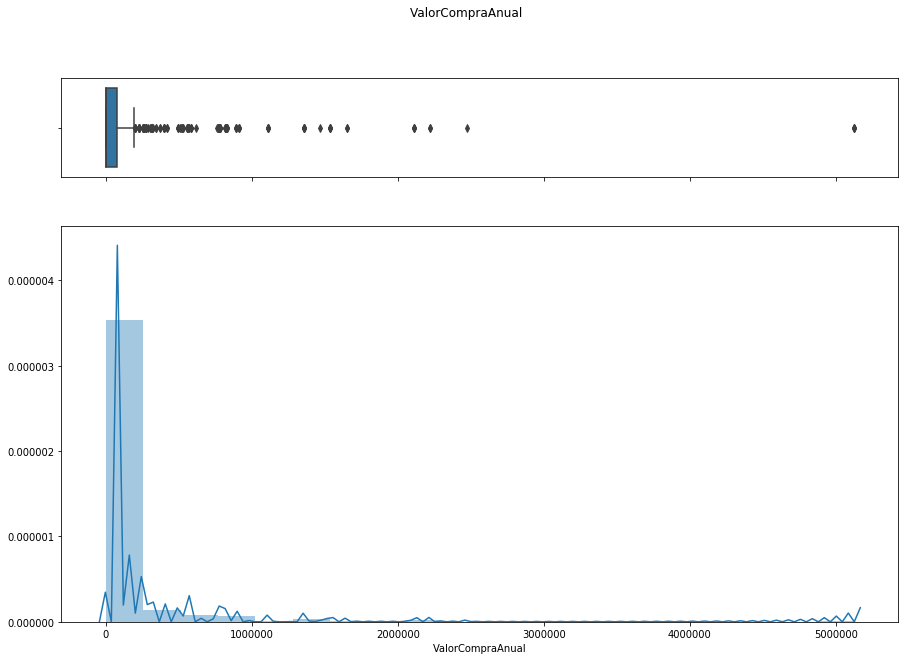

,count,mean,std,min,25%,50%,75%,max
ValorCompraAnual,1163.00,108034.13,366794.50,0.00,167.00,2625.00,78667.00,5123292.00


In [30]:
#analise de dados com boxplot + histograma + tabela
#nome da analise
analise=dados["ValorCompraAnual"]
#cria os graficos
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)}, figsize=([15,10]))
#titulo do grafico
f.suptitle(pd.DataFrame(analise).columns[0])
#faz o grafico
sns.boxplot(analise, ax=ax_box)
sns.distplot(analise, ax=ax_hist, bins=20 , kde=True)
#remove o nome do grafico no boxplot
ax_box.set(xlabel='')
#exibe o grafico
plt.savefig('ValorCompraAnual.svg')
plt.show()
#exibe tabela com os dados
pd.DataFrame(analise).describe().round(2).T

<font color='red'>**Observação:**</font> Observamos na variável <b>ValorCompraAnual</b> uma grande presença de dados outliers, que precisariam ser revistos nos sistemas origens, mas como não dispomos disto neste exercício, vamos manter os valores.

### GastoMax

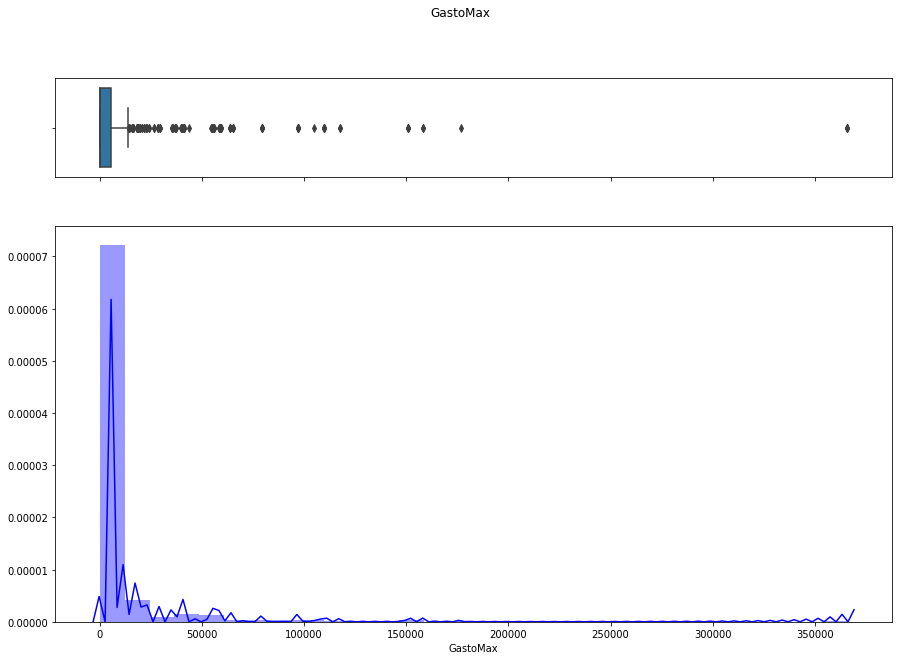

,count,mean,std,min,25%,50%,75%,max
GastoMax,1163.00,7716.72,26199.61,0.00,11.93,187.50,5619.07,365949.43


In [31]:
#'GastoMax'
#analise de dados com boxplot + histograma + tabela
#nome da analise
analise=dados["GastoMax"]
#cria os graficos
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)}, figsize=([15,10]))
#titulo do grafico
f.suptitle(pd.DataFrame(analise).columns[0])
#faz o grafico
sns.boxplot(analise, ax=ax_box)
sns.distplot(analise, ax=ax_hist, bins=30, color="b" )
#remove o nome do grafico no boxplot
ax_box.set(xlabel='')
#exibe o grafico
plt.savefig('GastoMax.svg')
plt.show()
#exibe tabela com os dados
pd.DataFrame(analise).describe().round(2).T

<font color='red'>**Observação:**</font> Da mesma forma que a variável <b>ValorCompraAnual</b>, temos na variável <b>GastoMax</b> uma grande quantidade de valores outliers.<br>
Temos tambem uma grande variedade nos valores, pois temos o mínimo de 0 e 75% da base até 5619, sendo que o valor máximo é muito alto: 365949,43

### GastoMedio

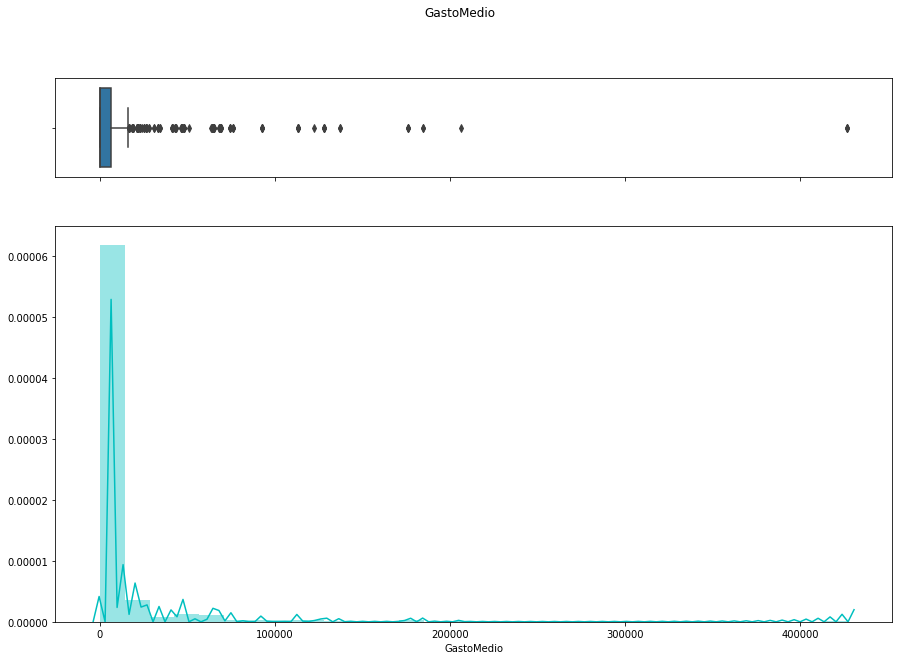

,count,mean,std,min,25%,50%,75%,max
GastoMedio,1163.00,9002.84,30566.21,0.00,13.92,218.75,6555.58,426941.00


In [32]:
#'GastoMedio'
#analise de dados com boxplot + histograma + tabela

#nome da analise
analise=dados["GastoMedio"]
#cria os graficos
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)}, figsize=([15,10]))
#titulo do grafico
f.suptitle(pd.DataFrame(analise).columns[0])
#faz o grafico
sns.boxplot(analise, ax=ax_box)
sns.distplot(analise, ax=ax_hist, bins=30, color="c" )
#remove o nome do grafico no boxplot
ax_box.set(xlabel='')
#exibe o grafico
plt.savefig('GastoMedio.svg')
plt.show()
#exibe tabela com os dados
pd.DataFrame(analise).describe().round(2).T

<font color='red'>**Observação:**</font> Da mesma forma que as duas ultimas variáveis, temos na variável <b>GastoMedio</b> uma grande quantidade de valores outliers.<br>
Temos tambem uma grande variedade nos valores, com um mínimo de 0 e 75% da base até 6555, sendo que o valor máximo é muito alto: 426941

### UF

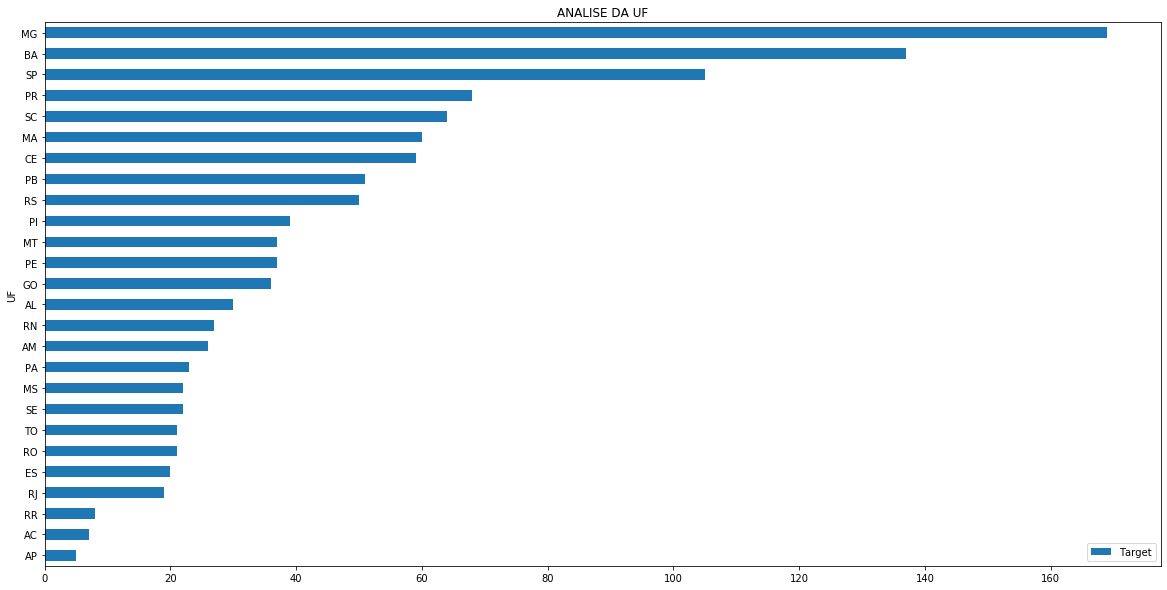

,9,4,24,16,22,8,5,13,21,15,11,14,7,1,18,2,12,10,23,25,19,6,17,20,0,3
UF,MG,BA,SP,PR,SC,MA,CE,PB,RS,PI,MT,PE,GO,AL,RN,AM,PA,MS,SE,TO,RO,ES,RJ,RR,AC,AP
Percentual,14.53,11.78,9.03,5.85,5.50,5.16,5.07,4.39,4.30,3.35,3.18,3.18,3.10,2.58,2.32,2.24,1.98,1.89,1.89,1.81,1.81,1.72,1.63,0.69,0.60,0.43


In [33]:
dados.groupby('UF', as_index=False)['Target'].count().sort_values(by='Target').plot.barh(x='UF', 
                                                                                  y='Target', 
                                                                                  figsize=(20,10),
                                                                                  title='ANALISE DA UF')
plt.savefig('UF.svg')
plt.show()
x=dados.groupby('UF', as_index=False)['Target'].count()
x['Percentual']=x['Target']/dados['UF'].count()*100
x[['UF','Percentual']].sort_values(by='Percentual', ascending=False).T

<font color='red'>**Observação:**</font> Vemos na variável <b>UF</b> a presença de todos os estados do Brasil, com uma concentração maior nos estados MG,BA e SP.<br>

### CidadeResidencia

In [34]:
#'CidadeResidencia'
print("Temos : ", dados['CidadeResidencia'].count(), "Registros")

max_cidaderesidencia=dados.groupby('CidadeResidencia')['Target'].count().max()
print("A cidade com maior recorrencia tem :", max_cidaderesidencia, "Registros")

conta_cidaderesidencia=dados.groupby('CidadeResidencia', as_index=False)['Target'].count().sort_values(by='Target', ascending=False)
lista_cidaderesidencia=conta_cidaderesidencia['CidadeResidencia'][conta_cidaderesidencia['Target']>(max_cidaderesidencia-1)].tolist()
print("Lista das cidades com o maior numero de recorrencias: ",lista_cidaderesidencia)

Temos :  1163 Registros
A cidade com maior recorrencia tem : 4 Registros
Lista das cidades com o maior numero de recorrencias:  ['Terra Roxa', 'Água Branca', 'São Domingos', 'Filadélfia']


## RegiaodoPais

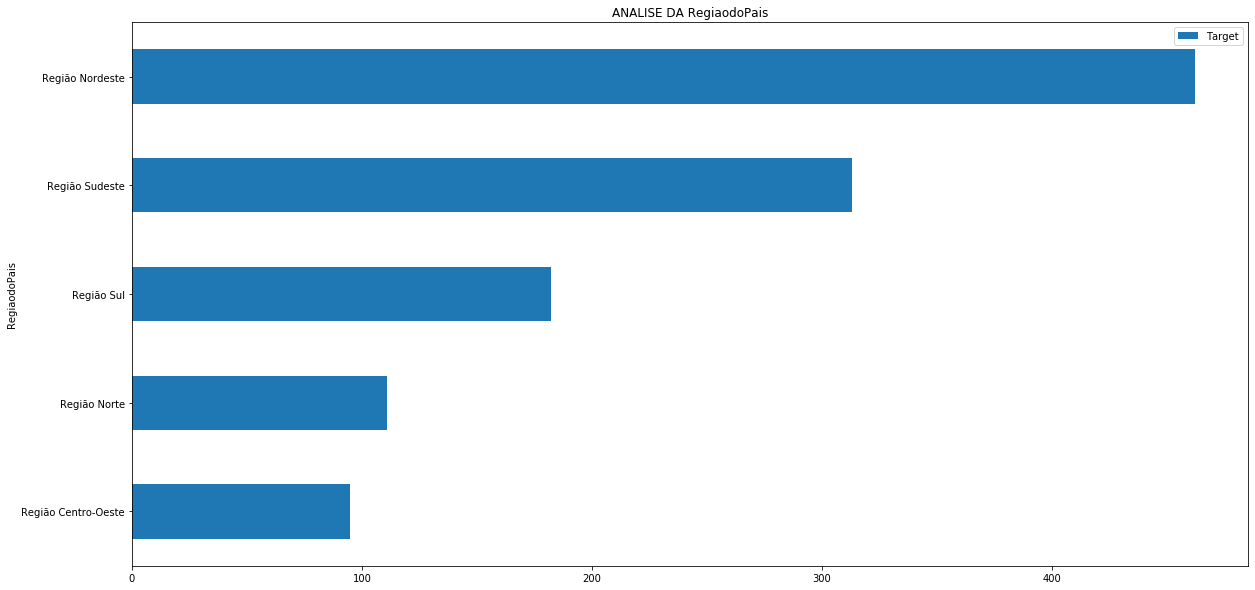

,1,3,4,2,0
RegiaodoPais,Região Nordeste,Região Sudeste,Região Sul,Região Norte,Região Centro-Oeste
Percentual,39.72,26.91,15.65,9.54,8.17


In [35]:
#'RegiaodoPais'
dados.groupby('RegiaodoPais', as_index=False)['Target'].count().sort_values(by='Target').plot.barh(x='RegiaodoPais', 
                                                                                  y='Target', 
                                                                                  figsize=(20,10),
                                                                                  title='ANALISE DA RegiaodoPais')
plt.savefig('RegiaoPais.svg')
plt.show()
x=dados.groupby('RegiaodoPais', as_index=False)['Target'].count()
x['Percentual']=x['Target']/dados['Target'].count()*100
x[['RegiaodoPais','Percentual']].sort_values(by='Percentual', ascending=False).T

<font color='red'>**Observação:**</font> Vemos na variável <b>RegiaodoPais</b> a presença de todas as regiões do Brasil, com uma concentração maior na região nordeste e sudeste.<br>

### NumeroComprasOnline

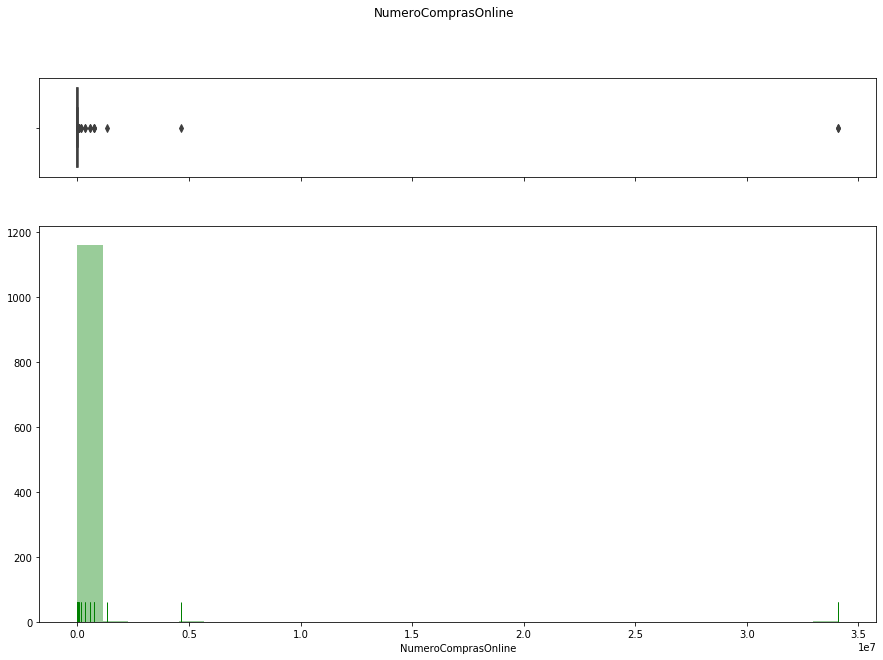

,count,mean,std,min,25%,50%,75%,max
NumeroComprasOnline,1163.00,68393.95,1421163.22,0.00,1.16,13.21,564.66,34107625.00


In [36]:
#analise de dados com boxplot + histograma + tabela

#nome da analise
analise=dados['NumeroComprasOnline']
#analise=dados1['NumeroComprasOnline'][dados1['NumeroComprasOnline']>=1.22][dados1['NumeroComprasOnline']<=524.24]
#analise=dados1['NumeroComprasOnline'][dados1['NumeroComprasOnline']!=34107625]
#cria os graficos
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)}, figsize=([15,10]))
#titulo do grafico
f.suptitle(pd.DataFrame(analise).columns[0])
#faz o grafico
sns.boxplot(analise, ax=ax_box)
sns.distplot(analise, ax=ax_hist, bins=30, color="g", kde=False,rug=True )
#remove o nome do grafico no boxplot
ax_box.set(xlabel='')
#exibe o grafico
plt.savefig('NumeroComprasOnline.svg')
plt.show()
#exibe tabela com os dados
pd.DataFrame(analise).describe().round(2).T

In [37]:
dados[dados['NumeroComprasOnline']>564].sort_values(by='NumeroComprasOnline').tail()

,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade,Target
127,3,mulher,20,0,86625.00,6187.50,7218.75,BA,Cabaceiras do Paraguaçu,Região Nordeste,721875.00,1,"53,0074952775",1
850,3,homem,21,4,31275.00,2233.93,2606.25,TO,Peixe,Região Norte,1303125.00,1,"4,7793805174",0
869,3,homem,40,1,111333.00,7952.36,9277.75,RN,Maxaranguape,Região Nordeste,4638875.00,6,"62,8636707737",0
445,1,homem,21,0,818583.00,58470.21,68215.25,RN,Jucurutu,Região Nordeste,34107625.00,9,"67,5306333825",0
259,1,homem,21,0,818583.00,58470.21,68215.25,RN,Jucurutu,Região Nordeste,34107625.00,1,"147,4040429204",1


<font color='red'>**Observação:**</font> Temos na variável <b>NumeroComprasOnline</b> dois valores muito diferente do resto da população da nossa amostra.<br>
Vamos optar por remover estes dois valores para que não influenciem na criação do nosso modelo.<br>

In [38]:
dados=dados[dados['NumeroComprasOnline']!=34107625]

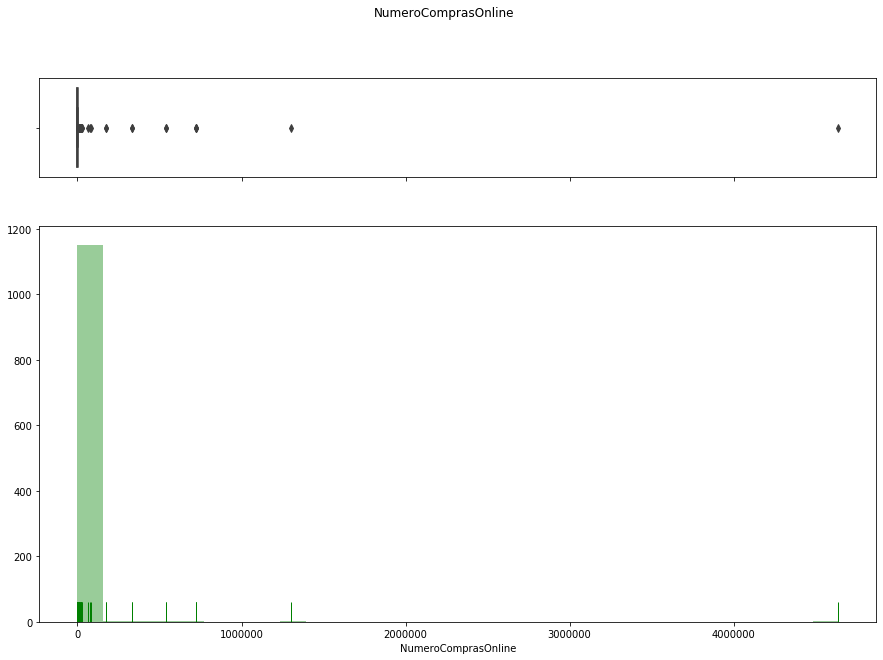

,count,mean,std,min,25%,50%,75%,max
NumeroComprasOnline,1161.00,9756.17,148459.42,0.00,1.16,13.21,555.29,4638875.00


In [39]:
#refazendo a análise

#nome da analise
analise=dados['NumeroComprasOnline']
#analise=dados1['NumeroComprasOnline'][dados1['NumeroComprasOnline']>=1.22][dados1['NumeroComprasOnline']<=524.24]
#analise=dados1['NumeroComprasOnline'][dados1['NumeroComprasOnline']!=34107625]
#cria os graficos
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)}, figsize=([15,10]))
#titulo do grafico
f.suptitle(pd.DataFrame(analise).columns[0])
#faz o grafico
sns.boxplot(analise, ax=ax_box)
sns.distplot(analise, ax=ax_hist, bins=30, color="g", kde=False,rug=True )
#remove o nome do grafico no boxplot
ax_box.set(xlabel='')
#exibe o grafico
plt.savefig('NumeroComprasOnline2.svg')
plt.show()
#exibe tabela com os dados
pd.DataFrame(analise).describe().round(2).T

<font color='red'>**Observação:**</font> Ainda temos valores muito altos na variavel <b>NumeroComprasOnline</b> e a presença de muitos outliers, o que pode implicar no enviesamento do nosso modelo, mas vamos mantes estes dados, no momento.

### MesesDesempregado

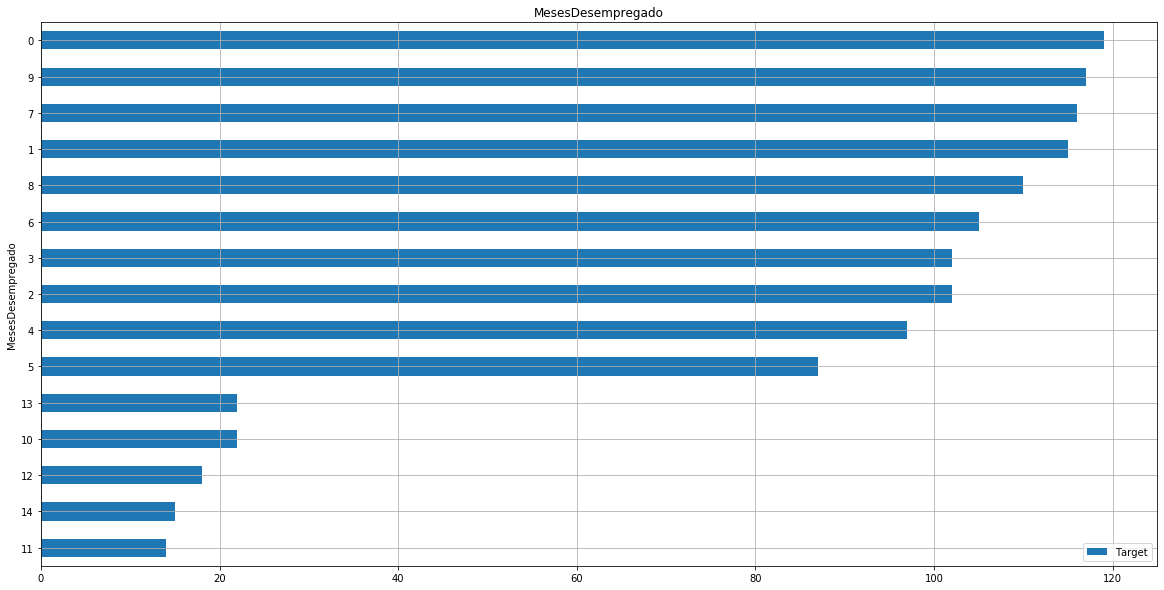

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
MesesDesempregado,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00
Percentual,10.25,9.91,8.79,8.79,8.35,7.49,9.04,9.99,9.47,10.08,1.89,1.21,1.55,1.89,1.29


In [40]:
#'MesesDesempregado'
dados.groupby('MesesDesempregado', 
               as_index=False)['Target'].count().sort_values(by='Target').plot.barh(x='MesesDesempregado',
                                                                            y='Target', 
                                                                            figsize=(20,10),
                                                                            grid=True,
                                                                            title='MesesDesempregado')
plt.show()
x=dados.groupby('MesesDesempregado', as_index=False)['Target'].count()
x['Percentual']=x['Target']/dados['Target'].count()*100
x[['MesesDesempregado','Percentual']].sort_values(by='MesesDesempregado', ascending=True).T

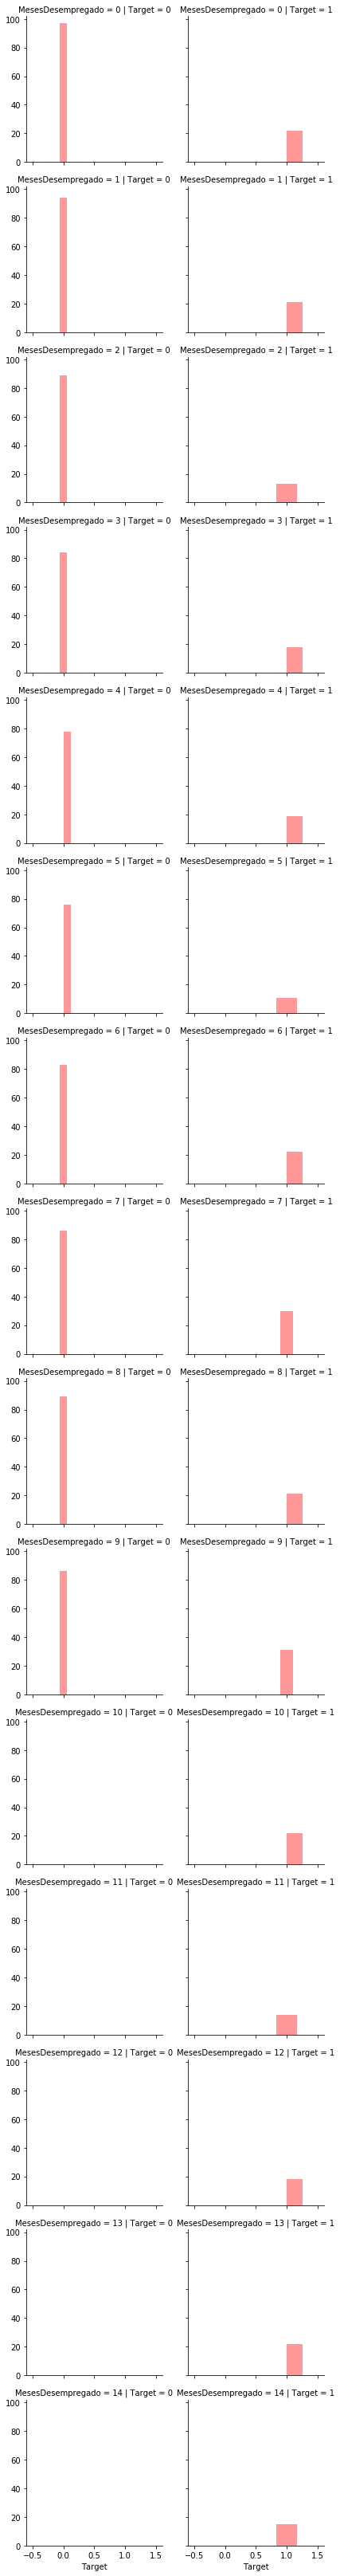

In [41]:
g = sns.FacetGrid(dados, row='MesesDesempregado', col='Target')
g = g.map(sns.distplot, 'Target', kde=False, color='r')

<font color='red'>**Observação:**</font> Na variavel <b>MesesDesempregado</b> vemos uma quantidade muito baixa para os meses de 10 à 14.<br>
Segregando os valores pelo Target, temos que estes valores estao presente somente na base de dados que cancelaram o cartão.<br>
Isto pode ser um indicativo de que estar desempregado acima de 9 meses, é grande a probabilidade de cancelamento do cartão.

### Anuidade

In [42]:
dados['Anuidade'].head(1)

0    251,1938708281
Name: Anuidade, dtype: object

<font color='red'>**Observação:**</font> Observe que a variavel <b>Anuidade</b> contém números, mas não está na nossa base como uma variável numérica.<br>
Isto ocorre, pela conversao de pontuação que está com virgula, fazendo este ser reconhecido como texto.<br>
vamos converter estes valores trocando o parador de virgula para ponto e depois convertendo para o formato numérico.

In [43]:
#trocando a formatação dos dados
dados['Anuidade']=dados['Anuidade'].replace(',','.', regex=True).values

In [44]:
#convertendo de object para float
dados['Anuidade']=pd.to_numeric(dados['Anuidade'])

In [45]:
dados['Anuidade'].head(1)

0   251.19
Name: Anuidade, dtype: float64

In [46]:
dados[['Anuidade']].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Anuidade,1161.00,84.28,69.57,0.01,34.27,69.65,107.75,309.38


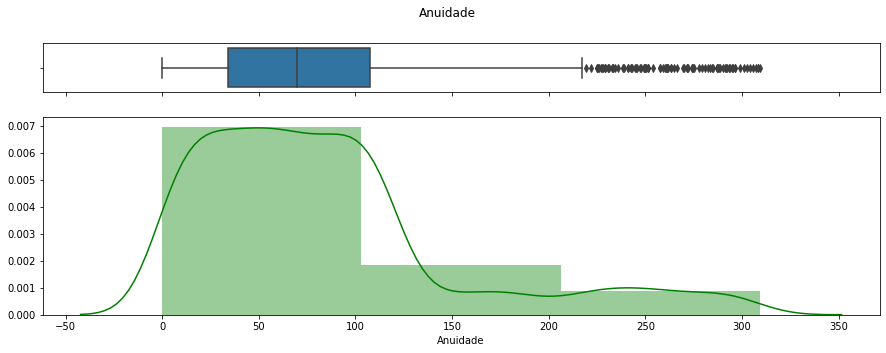

,count,mean,std,min,25%,50%,75%,max
Anuidade,1161.00,84.28,69.57,0.01,34.27,69.65,107.75,309.38


In [47]:
#'Anuidade'
#analise de dados com boxplot + histograma + tabela

#nome da analise
analise=dados['Anuidade']
#cria os graficos
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)}, figsize=(15,5))
#titulo do grafico
f.suptitle(pd.DataFrame(analise).columns[0])
#faz o grafico
sns.boxplot(analise, ax=ax_box)
sns.distplot(analise, ax=ax_hist, bins=3, color="g" )
#remove o nome do grafico no boxplot
ax_box.set(xlabel='')
#exibe o grafico
plt.savefig('anuidade.svg')
plt.show()
#exibe tabela com os dados
pd.DataFrame(analise).describe().round(2).T

<font color='red'>**Observação:**</font> Temos na variavel <b>Anuidade</b> uma grande concentração de valores nas faixas de 0 à 100, mostrando que os dados estão em uma distribuição assimétrica positiva.

### Target

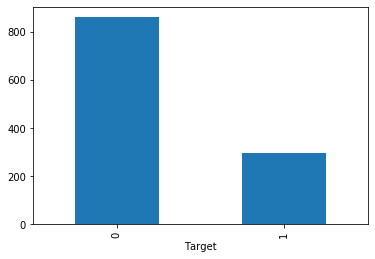

,Target,Quantidade,Percentual
0,0,862,74.25
1,1,299,25.75


In [48]:
dados.groupby(by='Target')['Sexo'].count().plot.bar()
plt.savefig('target.svg')
plt.show()
temp=dados.groupby('Target', as_index=False)['Sexo'].count()
temp.rename(columns={'Sexo':'Quantidade'}, inplace=True)
temp['Percentual']=temp['Quantidade']/dados.shape[0]*100
temp

<font color='red'>**Observação:**</font> Temos na variavel resposta <b>Target</b> uma boa distribuição dos dados, o que permite a criação de modelos, sem que o mesmo possa ficar tendencioso.

## Feature Engineering

Vamos olhar os tipos de variaveis que temos (dtypes) e tratar as variáveis do tipo object, criando dummies e/ou fazendo LabelEncoded.<br>
Algumas variáveis já estão no formato numérico, mas são variáveis categóricas, que precisam ser tratadas também.<br>
A definição de qual tratamento iremos utilizar se dá pela cardinalidade das variáveis (nunique).<br>
- <=10 = pd.get_dummies() <br>
- \>10 = LabelEncoder (sklearn)

In [49]:
dados.dtypes

PerfilEconomico          int64
Sexo                    object
Idade                    int64
PerfilCompra             int64
ValorCompraAnual       float64
GastoMax               float64
GastoMedio             float64
UF                      object
CidadeResidencia        object
RegiaodoPais            object
NumeroComprasOnline    float64
MesesDesempregado        int64
Anuidade               float64
Target                   int64
dtype: object

In [50]:
dados.nunique()

PerfilEconomico           3
Sexo                      2
Idade                    64
PerfilCompra              7
ValorCompraAnual        259
GastoMax                259
GastoMedio              259
UF                       26
CidadeResidencia        822
RegiaodoPais              5
NumeroComprasOnline     686
MesesDesempregado        15
Anuidade               1161
Target                    2
dtype: int64

In [51]:
#gerando variáveis dummies
dum = pd.get_dummies(dados, 
                      columns=['PerfilEconomico', 'Sexo', 'PerfilCompra', 'RegiaodoPais'],
                      drop_first=True, 
                      prefix =['PerfilEconomico', 'Sexo', 'PerfilCompra', 'RegiaodoPais'],
                      prefix_sep='_')
dum.head()

,Idade,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,NumeroComprasOnline,MesesDesempregado,Anuidade,Target,PerfilEconomico_2,PerfilEconomico_3,Sexo_mulher,PerfilCompra_1,PerfilCompra_2,PerfilCompra_3,PerfilCompra_4,PerfilCompra_5,PerfilCompra_8,RegiaodoPais_Região Nordeste,RegiaodoPais_Região Norte,RegiaodoPais_Região Sudeste,RegiaodoPais_Região Sul
0,24,1875.00,133.93,156.25,MA,Centro Novo do Maranhão,13.02,2,251.19,1,1,0,1,0,1,0,0,0,0,1,0,0,0
1,22,725.00,51.79,60.42,PI,Amarante,5.49,13,233.54,1,0,1,1,0,0,0,0,0,0,1,0,0,0
2,22,72292.00,5163.71,6024.33,MT,Santo Antônio do Leverger,547.67,2,275.44,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,22,155.00,11.07,12.92,PR,Quitandinha,1.17,13,2.00,1,0,1,0,1,0,0,0,0,0,0,0,0,1
4,15,26.00,1.86,2.17,SP,Nova Campina,0.29,7,249.33,1,1,0,1,1,0,0,0,0,0,0,0,1,0


In [52]:
dum.columns

Index(['Idade', 'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'UF',
       'CidadeResidencia', 'NumeroComprasOnline', 'MesesDesempregado',
       'Anuidade', 'Target', 'PerfilEconomico_2', 'PerfilEconomico_3',
       'Sexo_mulher', 'PerfilCompra_1', 'PerfilCompra_2', 'PerfilCompra_3',
       'PerfilCompra_4', 'PerfilCompra_5', 'PerfilCompra_8',
       'RegiaodoPais_Região Nordeste', 'RegiaodoPais_Região Norte',
       'RegiaodoPais_Região Sudeste', 'RegiaodoPais_Região Sul'],
      dtype='object')

Observe a criação das variáveis dummies após a variável Target 

In [53]:
#fazendo label enconding 
le = preprocessing.LabelEncoder()

le_UF = le.fit_transform(dum['UF'])
le_UF_df = pd.DataFrame(le_UF, columns=['LE_UF'])

le_cidade = le.fit_transform(dum['CidadeResidencia'])
le_cidade_df = pd.DataFrame(le_cidade, columns=['LE_CidadeResidencia'])

le_meses = le.fit_transform(dum['MesesDesempregado'])
le_meses_df = pd.DataFrame(le_meses, columns=['LE_MesesDesempregado'])

In [54]:
#juntando os dados com os dummies
dados_juntos = pd.merge(dum,le_UF_df, left_index=True, right_index=True)
dados_juntos = pd.merge(dados_juntos,le_cidade_df, left_index=True, right_index=True)
dados_juntos = pd.merge(dados_juntos,le_meses_df, left_index=True, right_index=True)

dados_juntos.head()

,Idade,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,NumeroComprasOnline,MesesDesempregado,Anuidade,Target,PerfilEconomico_2,PerfilEconomico_3,Sexo_mulher,PerfilCompra_1,PerfilCompra_2,PerfilCompra_3,PerfilCompra_4,PerfilCompra_5,PerfilCompra_8,RegiaodoPais_Região Nordeste,RegiaodoPais_Região Norte,RegiaodoPais_Região Sudeste,RegiaodoPais_Região Sul,LE_UF,LE_CidadeResidencia,LE_MesesDesempregado
0,24,1875.00,133.93,156.25,MA,Centro Novo do Maranhão,13.02,2,251.19,1,1,0,1,0,1,0,0,0,0,1,0,0,0,8,188,2
0,22,7250.00,517.86,604.17,MG,Morada Nova de Minas,54.92,5,62.93,0,0,1,0,1,0,0,0,0,0,0,0,1,0,8,188,2
1,22,725.00,51.79,60.42,PI,Amarante,5.49,13,233.54,1,0,1,1,0,0,0,0,0,0,1,0,0,0,15,25,13
1,38,71283.00,5091.64,5940.25,RN,Marcelino Vieira,312.64,7,37.92,0,0,0,1,1,0,0,0,0,0,1,0,0,0,15,25,13
2,22,72292.00,5163.71,6024.33,MT,Santo Antônio do Leverger,547.67,2,275.44,1,0,1,0,0,0,0,0,0,0,0,0,0,0,11,671,2


In [55]:
dados_juntos.columns

Index(['Idade', 'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'UF',
       'CidadeResidencia', 'NumeroComprasOnline', 'MesesDesempregado',
       'Anuidade', 'Target', 'PerfilEconomico_2', 'PerfilEconomico_3',
       'Sexo_mulher', 'PerfilCompra_1', 'PerfilCompra_2', 'PerfilCompra_3',
       'PerfilCompra_4', 'PerfilCompra_5', 'PerfilCompra_8',
       'RegiaodoPais_Região Nordeste', 'RegiaodoPais_Região Norte',
       'RegiaodoPais_Região Sudeste', 'RegiaodoPais_Região Sul', 'LE_UF',
       'LE_CidadeResidencia', 'LE_MesesDesempregado'],
      dtype='object')

In [56]:
#criando a ABT
dados_selecionados = dados_juntos[['Idade', 'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'NumeroComprasOnline', 
       'Anuidade', 'Target', 'PerfilEconomico_2', 'PerfilEconomico_3',
       'Sexo_mulher', 'PerfilCompra_1', 'PerfilCompra_2', 'PerfilCompra_3',
       'PerfilCompra_4', 'PerfilCompra_5', 'PerfilCompra_8',
       'RegiaodoPais_Região Nordeste', 'RegiaodoPais_Região Norte',
       'RegiaodoPais_Região Sudeste', 'RegiaodoPais_Região Sul', 'LE_UF',
       'LE_CidadeResidencia', 'LE_MesesDesempregado']]

In [57]:
#conferindo se todas as variaveis selecionadas estão numéricas
dados_selecionados.dtypes

Idade                             int64
ValorCompraAnual                float64
GastoMax                        float64
GastoMedio                      float64
NumeroComprasOnline             float64
Anuidade                        float64
Target                            int64
PerfilEconomico_2                 uint8
PerfilEconomico_3                 uint8
Sexo_mulher                       uint8
PerfilCompra_1                    uint8
PerfilCompra_2                    uint8
PerfilCompra_3                    uint8
PerfilCompra_4                    uint8
PerfilCompra_5                    uint8
PerfilCompra_8                    uint8
RegiaodoPais_Região Nordeste      uint8
RegiaodoPais_Região Norte         uint8
RegiaodoPais_Região Sudeste       uint8
RegiaodoPais_Região Sul           uint8
LE_UF                             int32
LE_CidadeResidencia               int32
LE_MesesDesempregado              int64
dtype: object

In [58]:
#selecionando as variáveis explicativas e a coluna target
explicativas = dados_selecionados.drop(columns=['Target'])
target = dados_selecionados['Target']

#### Selecionando as varáveis para o modelo

Vamos selecionar as variáveis para usar no nosso modelo, selecionando as que possuem maior importância para o mesmo.

In [59]:
# baseado em filtro

chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(explicativas, target)
chi_support = chi_selector.get_support()
chi_feature = explicativas.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

10 selected features
['Idade', 'ValorCompraAnual', 'GastoMax', 'GastoMedio', 'NumeroComprasOnline', 'Anuidade', 'RegiaodoPais_Região Sul', 'LE_UF', 'LE_CidadeResidencia', 'LE_MesesDesempregado']


In [60]:
# wrapper
rfe_selector = RFE(estimator=LogisticRegression(random_state=42), step=20, verbose=5, n_features_to_select=6)
rfe_selector.fit(explicativas, target)
rfe_support = rfe_selector.get_support()
rfe_feature = explicativas.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 22 features.
6 selected features
['Idade', 'Anuidade', 'PerfilEconomico_3', 'LE_UF', 'LE_CidadeResidencia', 'LE_MesesDesempregado']


In [61]:
# embedded
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                                     max_features=10)
embeded_rf_selector.fit(explicativas, target)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = explicativas.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

5 selected features
['NumeroComprasOnline', 'Anuidade', 'LE_UF', 'LE_CidadeResidencia', 'LE_MesesDesempregado']


In [62]:
# comparando os resultados
feature_selection_df = pd.DataFrame({'Variaveis':explicativas.columns,
                                     'Chi-2':chi_support,
                                     'RFE':rfe_support,
                                     'Random Forest':embeded_rf_support})
# count de quanto foi selecionada pra cada algoritmo
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# print das top 
feature_selection_df = feature_selection_df.sort_values(['Total','Variaveis'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Variaveis,Chi-2,RFE,Random Forest,Total
1,LE_UF,True,True,True,3
2,LE_MesesDesempregado,True,True,True,3
3,LE_CidadeResidencia,True,True,True,3
4,Anuidade,True,True,True,3
5,NumeroComprasOnline,True,False,True,2
6,Idade,True,True,False,2
7,ValorCompraAnual,True,False,False,1
8,RegiaodoPais_Região Sul,True,False,False,1
9,PerfilEconomico_3,False,True,False,1
10,GastoMedio,True,False,False,1


In [63]:
#colunas com valor > 0
col_sel=feature_selection_df['Variaveis'][feature_selection_df['Total']>1].tolist()
col_sel

['LE_UF',
 'LE_MesesDesempregado',
 'LE_CidadeResidencia',
 'Anuidade',
 'NumeroComprasOnline',
 'Idade']

In [64]:
expl = dados_selecionados[col_sel]
expl

,LE_UF,LE_MesesDesempregado,LE_CidadeResidencia,Anuidade,NumeroComprasOnline,Idade
0,8,2,188,251.19,13.02,24
0,8,2,188,62.93,54.92,22
1,15,13,25,233.54,5.49,22
1,15,13,25,37.92,312.64,38
2,11,2,671,275.44,547.67,22
...,...,...,...,...,...,...
886,5,7,610,39.63,0.08,27
887,21,7,634,69.14,0.26,19
888,15,3,725,11.44,11.17,35
889,9,5,404,1.47,0.19,26


## Modelagem

In [65]:
#separando em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(expl, target, test_size=0.3, random_state=42)

In [66]:
#criando os modelos vazios
modelo_rl = LogisticRegression(random_state=42)
modelo_arv = DecisionTreeClassifier(random_state=42)
modelo_rf = RandomForestClassifier(random_state=42)
modelo_gb = GradientBoostingClassifier(random_state=42)

In [67]:
#criando os dicionarios a serem utilizados no gridsearch

# dicionario da regressao logistica
grid_rl= {
    "C":np.logspace(-3,3,7),
    "penalty":["l2"]
}
# dicionario da arvore de decisão
grid_arv = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1,2,3,4,5,10]
}
# dicionario do random forest
grid_rf = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
# dicionario do GB
grid_gb = {
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"]
    }

In [68]:
#executando o gridsearch para regressao logistica
gs_lr = GridSearchCV(modelo_rl,
                     grid_rl,
                     scoring='accuracy',
                     cv=5);
#executando o gridsearch para arvore de decisão
gs_arv = GridSearchCV(modelo_arv,
                      grid_arv,
                      scoring='accuracy',
                      cv=5);
#executando o gridsearch para random forest
gs_rf = GridSearchCV(modelo_rf,
                     grid_rf,
                     scoring='accuracy',
                     cv=5);
#executando o gridsearch para gradient boosting
gs_gb = GridSearchCV(modelo_gb,
                     grid_gb,
                     scoring='accuracy',
                     cv=5);

In [69]:
#fit regressao logistica
gs_lr.fit(x_treino, y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [70]:
#fit arvore de decisao
gs_arv.fit(x_treino, y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [71]:
#fit random forest
gs_rf.fit(x_treino, y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [72]:
#fit gradient boosting 
gs_gb.fit(x_treino, y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

## Avaliação dos resultados

In [73]:
#score
#score treino
score_treino_lr = gs_lr.score(x_treino, y_treino)
score_treino_arv = gs_arv.score(x_treino, y_treino)
score_treino_rf = gs_rf.score(x_treino, y_treino)
score_treino_gb = gs_gb.score(x_treino, y_treino)

#score teste
score_teste_lr = gs_lr.score(x_teste, y_teste)
score_teste_arv = gs_arv.score(x_teste, y_teste)
score_teste_rf = gs_rf.score(x_teste, y_teste)
score_teste_gb = gs_gb.score(x_teste, y_teste)

#predict
#treino
y_gs_treino_lr = gs_lr.predict(x_treino)
y_gs_treino_arv = gs_arv.predict(x_treino)
y_gs_treino_rf = gs_rf.predict(x_treino)
y_gs_treino_gb = gs_gb.predict(x_treino)
#teste
y_gs_teste_lr = gs_lr.predict(x_teste)
y_gs_teste_arv = gs_arv.predict(x_teste)
y_gs_teste_rf = gs_rf.predict(x_teste)
y_gs_teste_gb = gs_gb.predict(x_teste)

#acuracia
#acuracia treino
acc_gs_treino_lr = round(accuracy_score(y_gs_treino_lr, y_treino)*100,2)
acc_gs_treino_arv = round(accuracy_score(y_gs_treino_arv, y_treino)*100,2)
acc_gs_treino_rf = round(accuracy_score(y_gs_treino_rf, y_treino)*100,2)
acc_gs_treino_gb = round(accuracy_score(y_gs_treino_gb, y_treino)*100,2)

#acuracia teste
acc_gs_teste_lr = round(accuracy_score(y_gs_teste_lr, y_teste)*100,2)
acc_gs_teste_arv = round(accuracy_score(y_gs_teste_arv, y_teste)*100,2)
acc_gs_teste_rf = round(accuracy_score(y_gs_teste_rf, y_teste)*100,2)
acc_gs_teste_gb = round(accuracy_score(y_gs_teste_gb, y_teste)*100,2)



In [74]:
#cross validation
#treino
cv_treino_lr = cross_val_score(estimator=modelo_rl, X=x_treino, y=y_treino, cv=10)
cv_treino_arv = cross_val_score(estimator=modelo_arv, X=x_treino, y=y_treino, cv=10)
cv_treino_rf = cross_val_score(estimator=modelo_rf, X=x_treino, y=y_treino, cv=10)
cv_treino_gb = cross_val_score(estimator=modelo_gb, X=x_treino, y=y_treino, cv=10)

#teste
cv_teste_lr = cross_val_score(estimator=modelo_rl, X=x_teste, y=y_teste, cv=10)
cv_teste_arv = cross_val_score(estimator=modelo_arv, X=x_teste, y=y_teste, cv=10)
cv_teste_rf = cross_val_score(estimator=modelo_rf, X=x_teste, y=y_teste, cv=10)
cv_teste_gb = cross_val_score(estimator=modelo_gb, X=x_teste, y=y_teste, cv=10)

In [75]:
#criar um df para comparar os modelos

modelos = pd.DataFrame({
    'Modelo': ['Regressão',
               'Arvore',
               'Random Forest',
               'Gradient boosting'],
    'BEST Score':[gs_lr.best_score_*100,
                  gs_arv.best_score_*100,
                  gs_rf.best_score_*100,
                  gs_gb.best_score_*100],
    'Score treino':[score_treino_lr*100,
                    score_treino_arv*100,
                    score_treino_rf*100,
                    score_treino_gb*100],
    'Score teste':[score_teste_lr*100,
                   score_teste_arv*100,
                   score_teste_rf*100,
                   score_teste_gb*100],
    'Acuracia de treino':[acc_gs_treino_lr,
                          acc_gs_treino_arv,
                          acc_gs_treino_rf,
                          acc_gs_treino_gb],
    'Acuracia de teste':[acc_gs_teste_lr,
                         acc_gs_teste_arv,
                         acc_gs_teste_rf,
                         acc_gs_teste_gb],
    'Cross Validation treino':[cv_treino_lr.mean()*100,
                               cv_treino_arv.mean()*100,
                               cv_treino_rf.mean()*100,
                               cv_treino_gb.mean()*100],
    'Cross Validation teste':[cv_teste_lr.mean()*100,
                              cv_teste_arv.mean()*100,
                              cv_teste_rf.mean()*100,
                              cv_teste_gb.mean()*100]
})
modelos.sort_values(by='Acuracia de teste', ascending=False)

,Modelo,BEST Score,Score treino,Score teste,Acuracia de treino,Acuracia de teste,Cross Validation treino,Cross Validation teste
3,Gradient boosting,89.90,99.26,88.54,99.26,88.54,89.28,86.82
2,Random Forest,90.52,100.00,88.25,100.00,88.25,89.65,89.11
1,Arvore,89.16,91.75,85.67,91.75,85.67,81.29,78.79
0,Regressão,84.23,84.48,82.81,84.48,82.81,84.22,80.52


<font color='red'>**Observação:**</font> Com base nos resultados apresentados acima, temos que o modelo de Gradient Boosting trouxe a melhor acurácia nos resultados de teste

In [76]:
#conhecendo o modelo escolhido
gs_gb.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [77]:
#conhecendo o modelo escolhido
gs_gb.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                        

## Deploy

In [78]:
#export do modelo
pickle.dump(gs_gb, open('modelo_gb_gridsearch.pkl', 'wb'))

modelo salvo: <a href='modelo_gb_gridsearch.pkl'>modelo_gb_gridsearch.pkl</a>